<a href="https://colab.research.google.com/github/SaurabhAradwad/NYC-Trip-Time-Prediction-Project/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

#### **Data Summary**

Column  | Description
------- | -------
**id** | a unique identifier for each trip  
**vendor_id** | a code indicating the provider associated with the trip record  
**pickup_datetime** | date and time when the meter was engaged  
**dropoff_datetime** | date and time when the meter was disengaged  
**passenger_count** | the number of passengers in the vehicle (driver entered value)  
**pickup_longitude** | the longitude where the meter was engaged  
**pickup_latitude** | the latitude where the meter was engaged  
**dropoff_longitude** | the longitude where the meter was disengaged  
**dropoff_latitude** | the latitude where the meter was disengaged  
**store_and_fwd_flag** | This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)  
**trip_duration** | duration of the trip in seconds  

#<b> 01 Connect To gitHub and Google drive

In [ ]:
# Cloning gitHub Repo to colab for csv file connection

!git clone https://github.com/SaurabhAradwad/Superwised-ML-Regression-Project

Cloning into 'Superwised-ML-Regression-Project'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [ ]:
# Mounting google drive to colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#<b> 02 Installation 🧰 and Importing Libraries 📘




In [3]:
# Install klib library
 
# klib is a Python library for importing, cleaning, analyzing and preprocessing data

!pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 4.9 MB/s 
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
# Import klib library
import klib

# Import essential libraries 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import datetime as dt
import warnings; warnings.simplefilter('ignore')

# Importing sklearn plot_tree, DecisionTreeRegressor, accuracy_score, train_test_split 
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, auc
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


#<b> 03 Import CSV 📁 dataset as 🐼 DataFrame and 🔍 Inspection

##<b> Import CSV from drive

In [ ]:
# Importing csv dataset as DataFrame using Pandas Read CSV function
df = pd.read_csv('/content/drive/MyDrive/Capstone Project Folder/02 Superwised ML Regression/NYC Taxi Data.csv')

##<b> Data Inspection

In [ ]:
# Checking Head
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
# Checking Tail
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [ ]:
# Checking basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
# Checking default data summary using describe method and including non numerical features
df.describe(include= 'all')

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1458644,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644,1.458644e+06
unique,1458644,NaN,1380222,1380377,NaN,NaN,NaN,NaN,NaN,2,NaN
top,id2875421,NaN,2016-03-04 08:07:34,2016-02-19 19:25:04,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,1,NaN,5,5,NaN,NaN,NaN,NaN,NaN,1450599,NaN
mean,NaN,1.534950e+00,NaN,NaN,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,NaN,9.594923e+02
std,NaN,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,NaN,5.237432e+03
min,NaN,1.000000e+00,NaN,NaN,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,NaN,1.000000e+00
25%,NaN,1.000000e+00,NaN,NaN,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,NaN,3.970000e+02
50%,NaN,2.000000e+00,NaN,NaN,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,NaN,6.620000e+02
75%,NaN,2.000000e+00,NaN,NaN,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,NaN,1.075000e+03


In [ ]:
# Count unique values each columns
df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

In [ ]:
# Checking null values in each columns if any
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

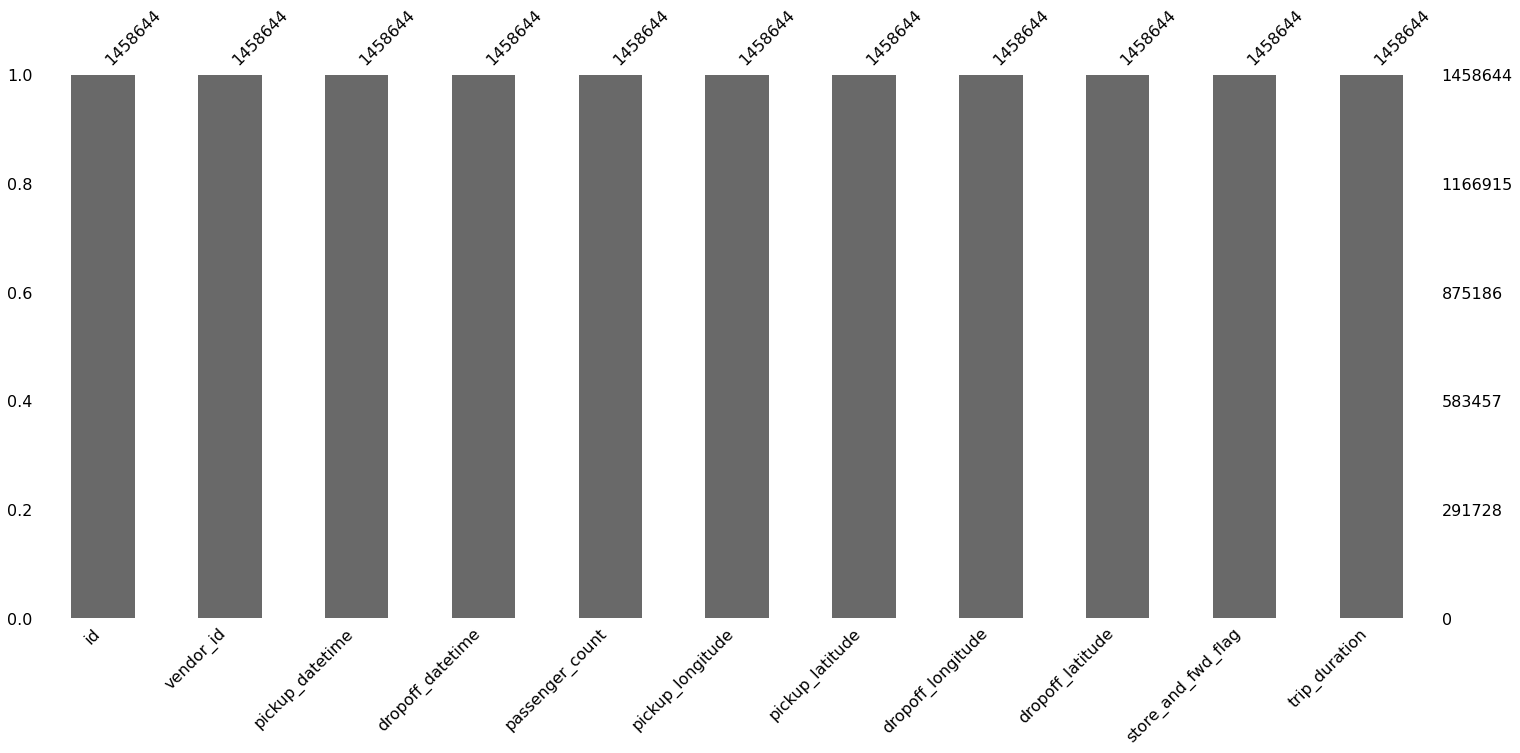

In [ ]:
# Countplot for null values(before)

# Visualize the number of missing values (here no any missing values)

msno.bar(df)

#<b> 04 EDA 🔍 on NYC Taxi dataset

### Let's do some **Exploratary Data Analysis** on given dataset using **klib.**


In [ ]:
# klib.describe - functions for visualizing datasets
'''
klib.cat_plot(df) # returns a visualization of the number and frequency of categorical features
klib.corr_mat(df) # returns a color-encoded correlation matrix
klib.corr_plot(df) # returns a color-encoded heatmap, ideal for correlations
klib.dist_plot(df) # returns a distribution plot for every numeric feature
klib.missingval_plot(df) # returns a figure containing information about missing values

'''

'\nklib.cat_plot(df) # returns a visualization of the number and frequency of categorical features\nklib.corr_mat(df) # returns a color-encoded correlation matrix\nklib.corr_plot(df) # returns a color-encoded heatmap, ideal for correlations\nklib.dist_plot(df) # returns a distribution plot for every numeric feature\nklib.missingval_plot(df) # returns a figure containing information about missing values\n\n'

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


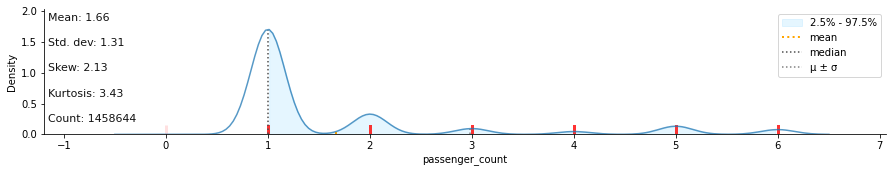

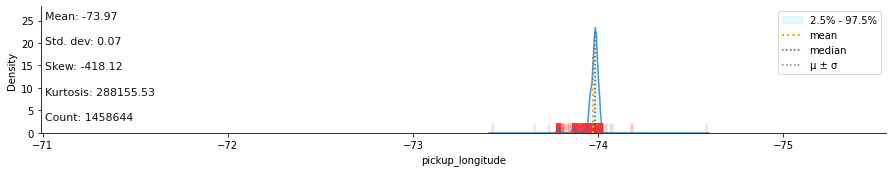

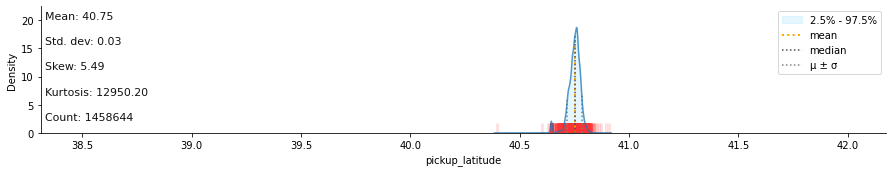

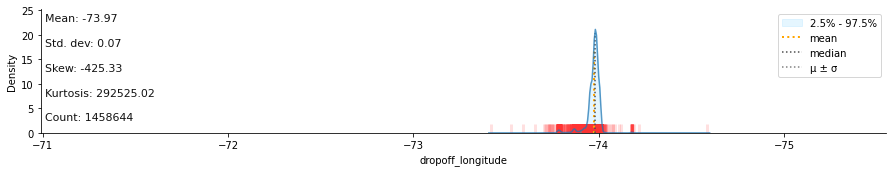

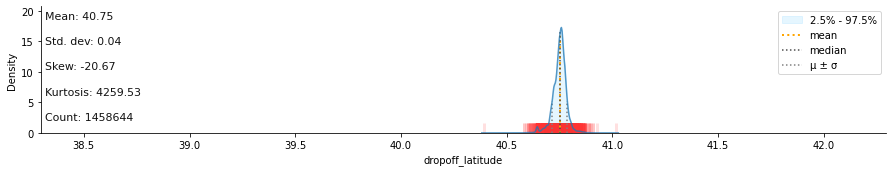

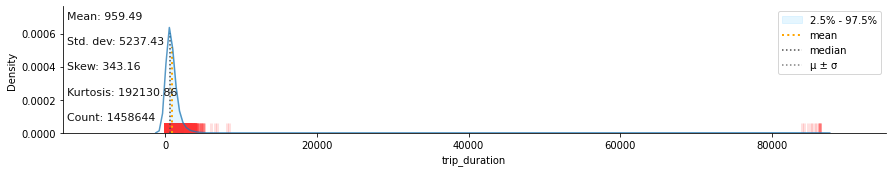

In [ ]:
#  A distribution plot for every numeric feature

klib.dist_plot(df) 

In [ ]:
#  A color-encoded correlation matrix

klib.corr_mat(df)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
vendor_id,1.00,0.29,0.01,0.00,0.00,0.00,0.02
passenger_count,0.29,1.00,0.00,-0.01,-0.00,-0.00,0.01
pickup_longitude,0.01,0.00,1.00,0.02,0.78,0.10,0.03
pickup_latitude,0.00,-0.01,0.02,1.00,0.11,0.49,-0.03
dropoff_longitude,0.00,-0.00,0.78,0.11,1.00,0.12,0.01
dropoff_latitude,0.00,-0.00,0.10,0.49,0.12,1.00,-0.02
trip_duration,0.02,0.01,0.03,-0.03,0.01,-0.02,1.00


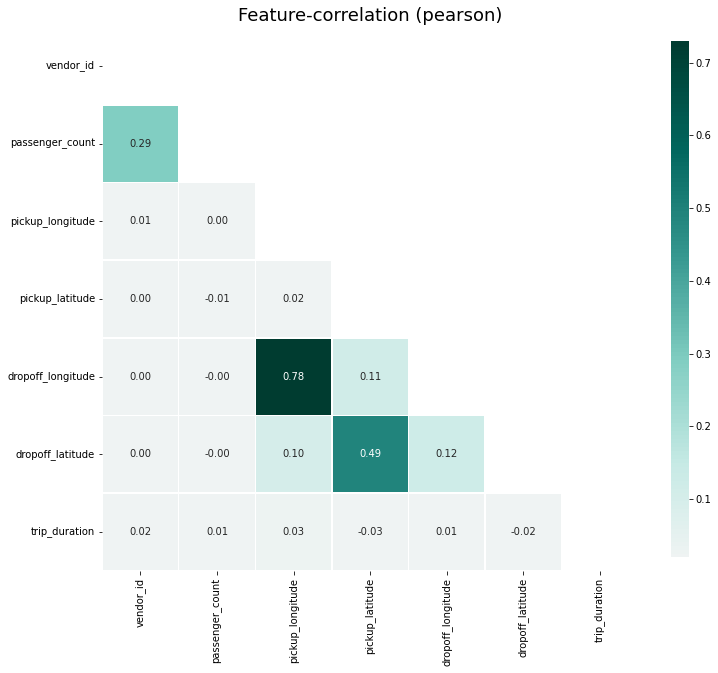

In [ ]:
# A color-encoded heatmap for correlations

klib.corr_plot(df) 

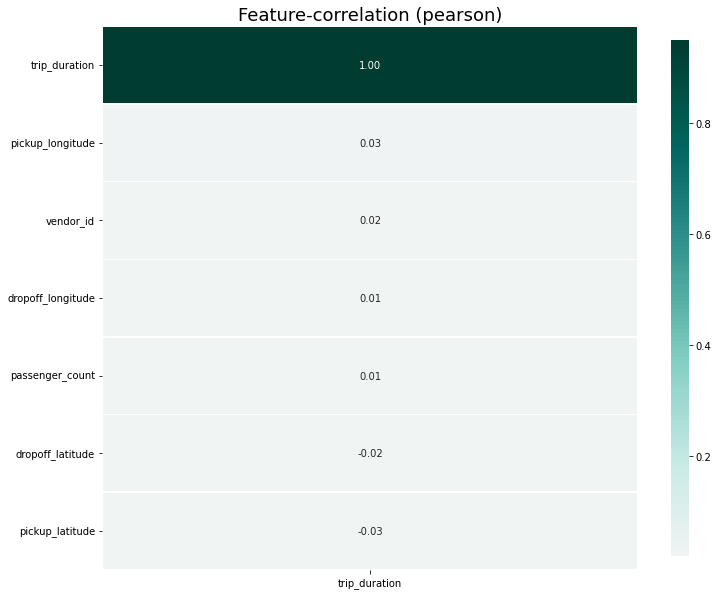

In [ ]:
# Correlation graph dependent and independent features

klib.corr_plot(df, target=df['trip_duration']) 

In [ ]:
#  A figure containing information about missing values
klib.missingval_plot(df) 

No missing values found in the dataset.


In [ ]:
# Checking number of rows and columns in our dataset.

print("Number of rows in dataset are:", df.shape[0])
print("Number of columns in dataset are:", df.shape[1])

Number of rows in dataset are: 1458644
Number of columns in dataset are: 11


In [ ]:
# Now let's consider each column in dataset as feture in our dataset.
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

#<b> 05  Feature Creation
#### Let us extract **pickup_datetime** and **dropoff_datetimeand** to create some new features using pandas datetime.

In [ ]:
# Changing 'object' type of pickup_datetime, dropoff_datetime. Converting it into 'datetime' type.
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [ ]:
# It will contain the day number instead of characters with Monday=0 to Sunday=6.
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

# It will convert weekday into number start at Monday=0 and end at Sunday=6.
df['pickup_day_no']=df['pickup_datetime'].dt.weekday
df['dropoff_day_no']=df['dropoff_datetime'].dt.weekday

# Extract hour only from pickup_datetime.
df['pickup_hour']=df['pickup_datetime'].dt.hour
df['dropoff_hour']=df['dropoff_datetime'].dt.hour

# Extract month in number only from pickup_datetime with January=1
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

##<b> Newly added Features are 
* pickup_day 
* dropoff_day
* pickup_day_no
* dropoff_day_no
* pickup_hour
* dropoff_hour
* pickup_month
* dropoff_month

##### We will start with **pickup_day** & **dropoff_day** , they contains the name of the day on which the ride was taken as **Monday=0** to **Sunday=6**.

##### **pickup_day_no** & **dropoff_day_no** , they contain the day number instead of characters with **Monday=0** and **Sunday=6**

##### **pickup_hour** & **dropoff_hour** , they contain an hour of the day in the 24-hour format.

##### **pickup_month** & **dropoff_month** , they contain the month number with **January=1** ..... **June=06** till  **December=12**.






During dataset research, we found that the **pickup_longitude**,     **pickup_latitude**, **dropoff_longitude** & **dropoff_latitude** have coordinates in the form of longitude and latitude. But from it, we really can't infer anything or come to any conclusions.

Therefore, **distance** is the most obvious feature we can draw from this. Let's carry it out.

###**Lets Importing the geopy.distance library which will help us calculate distance from geographical coordinates**.

In [ ]:
# importing geopy library
from geopy.distance import great_circle

In [ ]:
# Creating the function for calculating distance between pickup and dropoff
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [ ]:
# Applying the function to our dataset and creating the feature ‘distance’.
df['distance'] = df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

**Lets Create New Feature Speed(km/Hr) With help of Distance and Duration Column**

In [ ]:
# creating new feature Speed
df['speed'] = (df.distance*3600/(df.trip_duration))

Next,Lets defined a function that lets us determine what time of the day the ride was taken.

We will create four parts of time:-

1.**Morning** (from 6:00 am to 11:59 pm),

2.**Afternoon** (from 12 noon to 3:59 pm),

3.**Evening** (from 4:00 pm to 9:59 pm), and

4.**Late Night** (from 10:00 pm to 5:59 am)

In [ ]:
#Dividing 24 hours into four parts
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [ ]:
#Now let us apply this function and create new columns in the dataset.
df['pickup_timeofday'] = df['pickup_hour'].apply(time_of_day)
df['dropoff_timeofday']=df['dropoff_hour'].apply(time_of_day)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,distance,speed,pickup_timeofday,dropoff_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0,0,17,17,3,3,1.498523,11.856445,Evening,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,6,0,0,6,6,1.805510,9.803673,Late night,Late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,1,11,12,1,1,6.385108,10.822216,Morning,Afternoon
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,2,2,19,19,4,4,1.485501,12.465739,Evening,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5,5,13,13,3,3,1.188590,9.836608,Afternoon,Afternoon


In [ ]:
#Let us check the data type of all features.
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_day                    object
dropoff_day                   object
pickup_day_no                  int64
dropoff_day_no                 int64
pickup_hour                    int64
dropoff_hour                   int64
pickup_month                   int64
dropoff_month                  int64
distance                     float64
speed                        float64
pickup_timeofday              object
dropoff_timeofday             object
dtype: object

Now our dataset is complete for the further analysis before we train our model with optimal variables.

#<b> 06 Feature Analysis


##<b>Univarate Analysis
The univariate analysis involves studying patterns of all variables individually.

**Target Variable** - **Trip Duration**



Let us start with the target varibale i.e trip duration.

###<b>1.Trip duration.

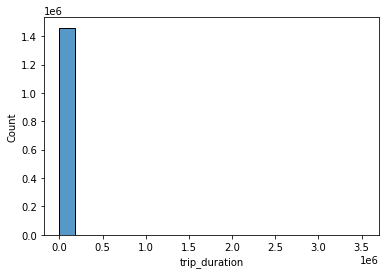

In [ ]:
#Plotting histogram of trip duration 
sns.histplot(df['trip_duration'],kde=False,bins=20)

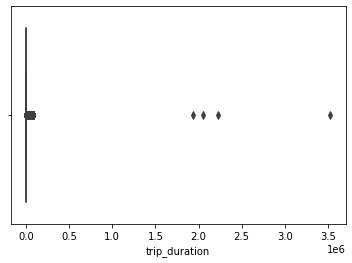

In [ ]:
#Plotting boxplot of trip duration
sns.boxplot(df['trip_duration'])

In [ ]:
#lets see percentile from 0 to 100
for i in range(0,100,10):
  duration= df['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

0 percentile value is 1
10 percentile value is 245
20 percentile value is 348
30 percentile value is 446
40 percentile value is 548
50 percentile value is 662
60 percentile value is 798
70 percentile value is 968
80 percentile value is 1208
90 percentile value is 1634
100 percentile value is  3526282


In [ ]:
#lets see percentile from 90 to 100 
for i in range(90,100):
  duration= df['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

90 percentile value is 1634
91 percentile value is 1703
92 percentile value is 1780
93 percentile value is 1869
94 percentile value is 1975
95 percentile value is 2104
96 percentile value is 2273
97 percentile value is 2497
98 percentile value is 2829
99 percentile value is 3440
100 percentile value is  3526282


In [ ]:
#lets see percentile from 0 to 10 
for i in range(0,10):
  duration= df['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

0 percentile value is 1
1 percentile value is 87
2 percentile value is 122
3 percentile value is 146
4 percentile value is 165
5 percentile value is 180
6 percentile value is 195
7 percentile value is 209
8 percentile value is 221
9 percentile value is 233
100 percentile value is  3526282


**We can see that there are some entries  which are significantly different from others. As there are four rows only, let us drop this row.**

In [ ]:
# Setting Trip duration upper limit
nyc_taxi = df[df.trip_duration <= 3400]

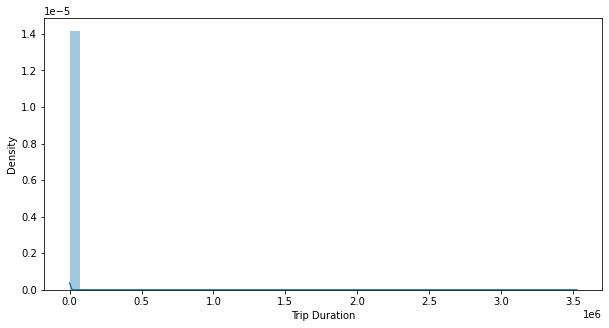

In [ ]:
#distribution plot for trip duration after setting upper limit
plt.figure(figsize = (10,5))
sns.distplot(df['trip_duration'])
plt.xlabel('Trip Duration')
plt.show()

This distribution shows right skewness, hence let's apply the log10 to transform it to the normal distribution.

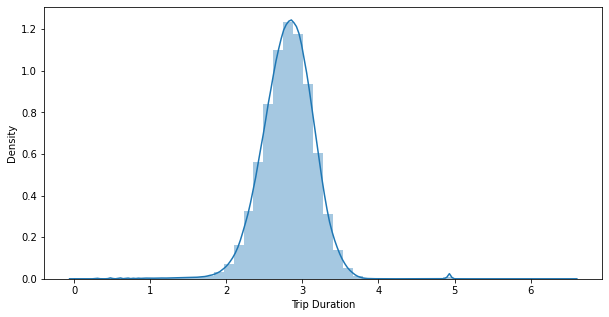

In [ ]:
#distribution plot for trip duration applying log of trip_duration
plt.figure(figsize = (10,5))
sns.distplot(np.log10(df['trip_duration']))
plt.xlabel('Trip Duration')
plt.show()

* Here, we can see that trip_duration is normally distributed.
* There are some outliers. Lets see the boxplot of this variable.

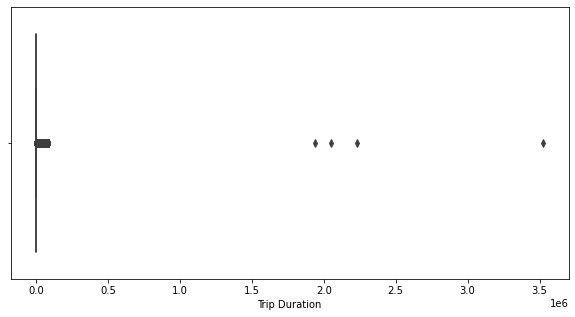

In [ ]:
#Boxplot for trip duration 
plt.figure(figsize = (10,5))
sns.boxplot(df.trip_duration)
plt.xlabel('Trip Duration')
plt.show()

We can clearly see an outlier and should be removed for the data consistency.

Calclating 0-100th percentille to find a correct percentile value for removal of outliers.

The 90th percentile i.e. 1634 looks reasonable. But, 100th percentile i.e. 3526282 is outlier. Hence removing these would be a better idea.

Let's expand from 90th percentile to 100th percentile as to look further for the 99th percentile.

**Let's visualize the number of trips taken in diifferent slabs of ... secconds respectively**

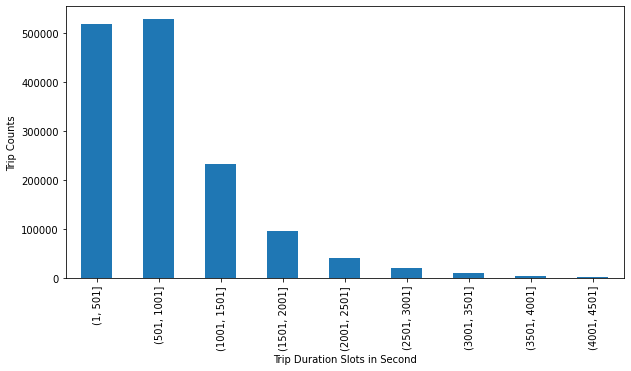

In [ ]:
#lets see the trip count between 1 to 5000 sec trip duration
plt.figure(figsize = (10,5))
df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(1,5000,500))).count().plot(kind='bar')
plt.xlabel('Trip Duration Slots in Second')
plt.ylabel('Trip Counts')
plt.show()

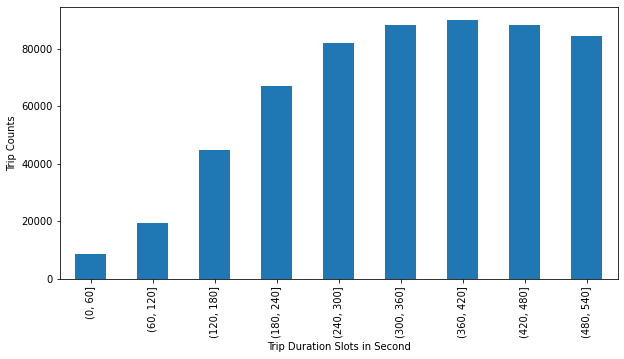

In [ ]:
#lets see the trip count between 1 to 600 sec trip duration
plt.figure(figsize = (10,5))
df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(0,600,60))).count().plot(kind='bar')
plt.xlabel('Trip Duration Slots in Second')
plt.ylabel('Trip Counts')
plt.show()

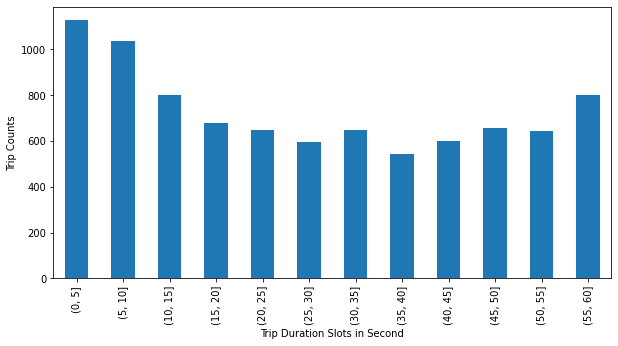

In [ ]:
#lets see the trip count between 1 to 60 sec trip duration
plt.figure(figsize = (10,5))
df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(0,61,5))).count().plot(kind='bar')
plt.xlabel('Trip Duration Slots in Second')
plt.ylabel('Trip Counts')
plt.show()

We have seen the 10 largest and smallest value of trip_duration.

We can see that major chunk (99th percentile) of trip duration is completed in 3440 seconds i.e. nearly 1 hour.

There are very few trip which have duration greater than 5000 seconds.

There are some durations with as low as 1 second. which points towards trips with 0 km distance.

We should get rid the outliers for the sake of data consistency. (Trip duration greater than 5000 seconds and also trip duration less than 30 seconds)

###<b> 2.Pickup_timeofday & Dropoff_timeofday

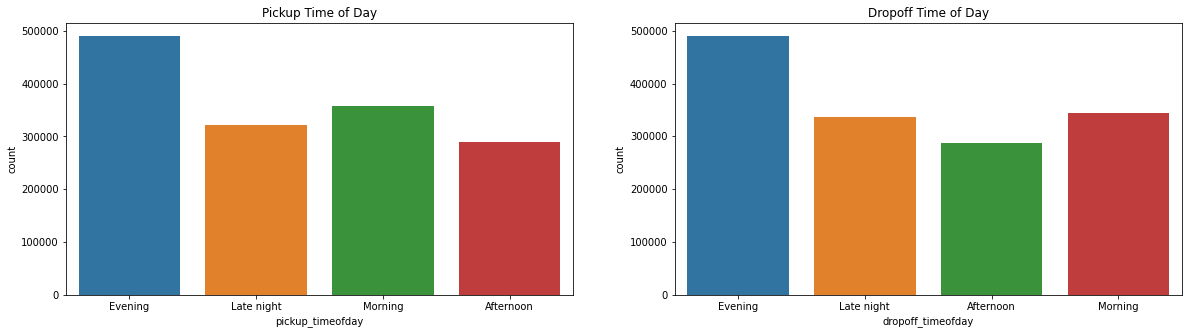

In [ ]:
#lets see pickup and dropoff count at different parts of a day
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=df,ax=ax3)
ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=df,ax=ax4)

As we saw above, evenings are the busiest.

### <b>3. Vendor id

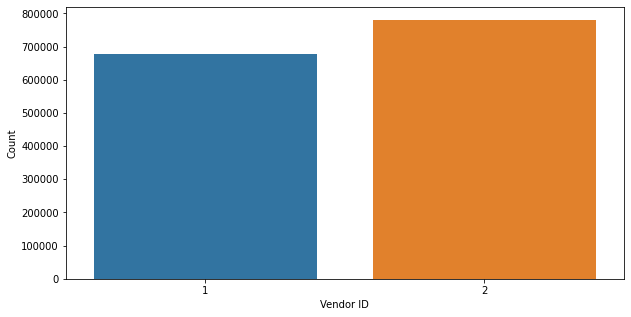

In [ ]:
#lets see which vendor having more trips
plt.figure(figsize = (10,5))
sns.countplot(df.vendor_id)
plt.xlabel('Vendor ID')
plt.ylabel('Count')
plt.show()

We see that there is not so much difference between the trips taken by both vendors.

### <b>4. Passenger count

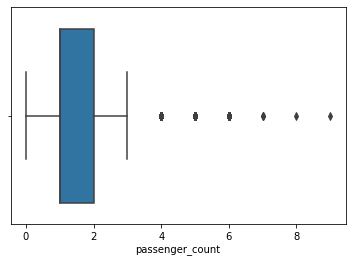

In [ ]:
#plotting boxplot of passenger 
sns.boxplot(df['passenger_count'])

In [ ]:
#explore the passenger count and their numbers of trips 
no_of_passenger = df['passenger_count'].value_counts().reset_index()
no_of_passenger.rename(columns={'index':'no_of_passenger', 'passenger_count':'trip_counts'})

,no_of_passenger,trip_counts
0,1,1033540
1,2,210318
2,5,78088
3,3,59896
4,6,48333
5,4,28404
6,0,60
7,7,3
8,9,1
9,8,1


Let us remove the rows which have 0,7, 8 and 9 passenger count

In [ ]:
#Removing 0 and more than 6 passenger 
df = df[df['passenger_count'] != 0]
df = df[df['passenger_count']<=6]

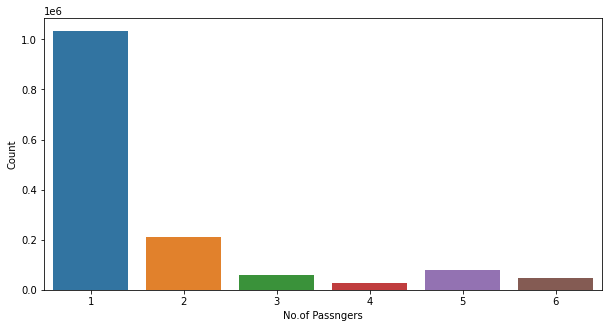

In [ ]:
#bar plot after setting the passenger count range
plt.figure(figsize = (10,5))
sns.countplot(x='passenger_count',data=df)
plt.ylabel('Count')
plt.xlabel('No.of Passngers')
plt.show()

* We see the highest amount of trips was taken by a single passenger.
* The instance of large group of people travelling together is rare.

### <b>5.Store and Forward Flag

In [ ]:
#counting Store and Forward Flag Y & N
df['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994486
Y    0.005514
Name: store_and_fwd_flag, dtype: float64

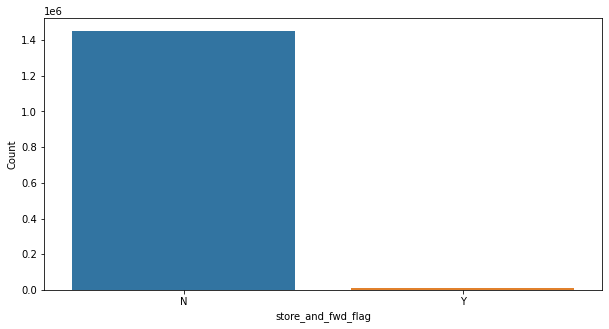

In [ ]:
#barplot of Store and Forward Flag Y & N
plt.figure(figsize = (10,5))
sns.countplot(x='store_and_fwd_flag',data=df)
plt.ylabel('Count')
plt.xlabel('store_and_fwd_flag')
plt.show()

* We can see that only about 1% of the trip details were stored in the vehicle memory first before sending it to the server.

* This might have occured because of the GPS or mobile device battery was down when the trip finished.

### <b>6.Distance

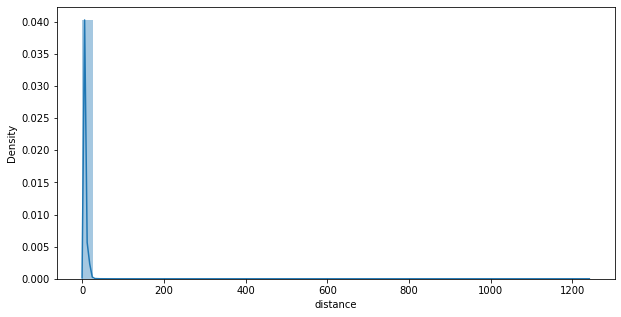

In [ ]:
#distribution plot of distance
plt.figure(figsize = (10,5))
sns.distplot(df['distance'])
plt.xlabel('distance')
plt.show()

In [ ]:
#Removing  entries which are having distance less than 50 metere
df = df[df['distance'] > 0.05]

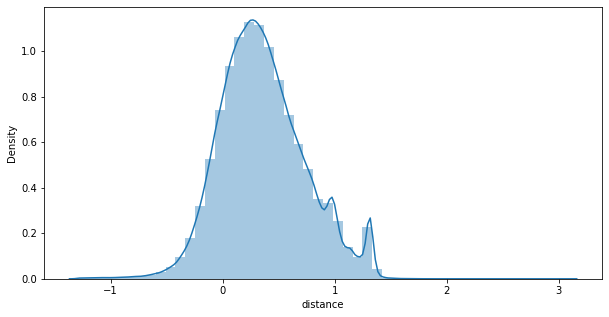

In [ ]:
#distribution plot of distance that above 50 m
plt.figure(figsize = (10,5))
sns.distplot(np.log10(df['distance']))
plt.xlabel('distance')
plt.show()

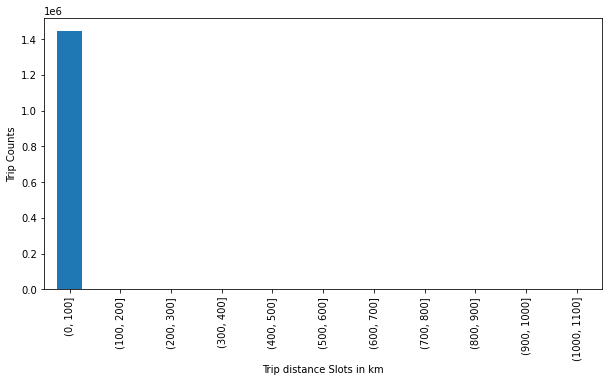

In [ ]:
#Barplot of distance from 0 to 1200 km
plt.figure(figsize = (10,5))
df.distance.groupby(pd.cut(df.distance, np.arange(0,1200,100))).count().plot(kind='bar')
plt.xlabel('Trip distance Slots in km')
plt.ylabel('Trip Counts')
plt.show()

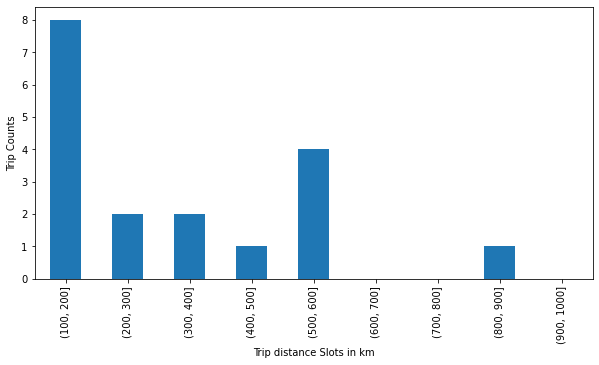

In [ ]:
#Barplot of distance from 100 to 1000 km
plt.figure(figsize = (10,5))
df.distance.groupby(pd.cut(df.distance, np.arange(100,1001,100))).count().plot(kind='bar')
plt.xlabel('Trip distance Slots in km')
plt.ylabel('Trip Counts')
plt.show()

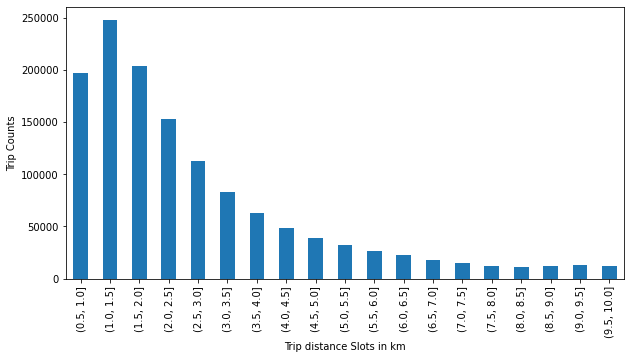

In [ ]:
#Barplot of distance from 0 to 10 km
plt.figure(figsize = (10,5))
df.distance.groupby(pd.cut(df.distance, np.arange(0.5,10.1,0.5))).count().plot(kind='bar')
plt.xlabel('Trip distance Slots in km')
plt.ylabel('Trip Counts')
plt.show()

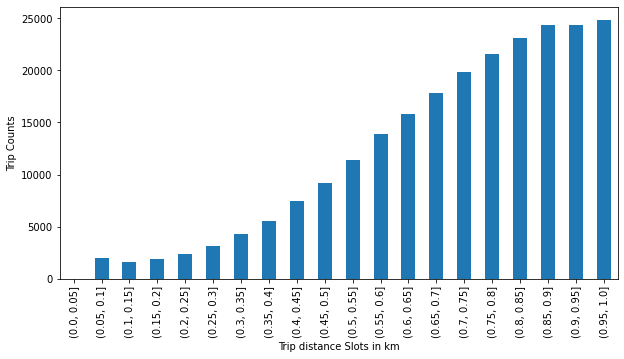

In [ ]:
#Barplot of distance from 0 to 1 km
plt.figure(figsize = (10,5))
df.speed.groupby(pd.cut(df.distance, np.arange(0,1.05,0.05))).count().plot(kind='bar')
plt.xlabel('Trip distance Slots in km')
plt.ylabel('Trip Counts')
plt.show()

In [ ]:
#Removing the rows which are having distance  More than 100 km
df = df[df['distance'] <= 100]

In [ ]:
df.distance.max()

97.58634935684432

* There are **16 trips with more than 100 km** distance.
* There are **5887 trips with 0 km** distance. so this trip will unneccsary infuence our model that we are droping this rows

**The possible reasons for 0 km trips can be:**

* The dropoff location couldn’t be tracked.
* The driver deliberately took this ride to complete a target ride number.
* The passengers or driver cancelled the trip due to some issue.
* Due to some technical issue in software, etc.

### <b>7.Speed

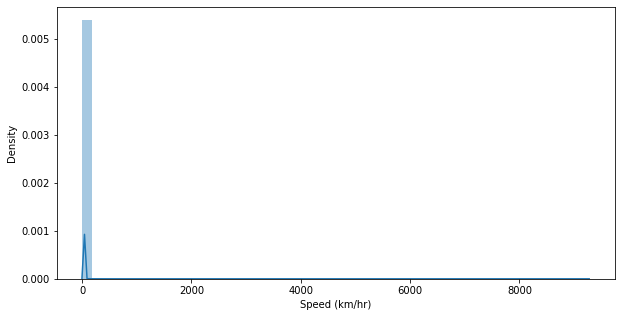

In [ ]:
#Distribution plot of speed (km/hr)
plt.figure(figsize = (10,5))
sns.distplot(df['speed'])
plt.xlabel('Speed (km/hr)')
plt.show()

In [ ]:
#Maximum speed of the car
df.speed.max()

9274.849833350514

So At Some Places Speed of the taxi is quite high its from **200 to 9274** So which is unresonble.

1. So it may be because of Some pasemger they might have canceled trip in between on  the way after traveling some distance.
2. The dropoff location couldn’t be tracked.
3. The passengers or driver cancelled the trip due to some issue.
4. Due to some technical issue in software, etc.

so in order to have consitant data **lets drop the rows which have speed more than 50 km/hr.** 

In [ ]:
df = df[df['speed']<=50]
df = df[df['speed']>=5]

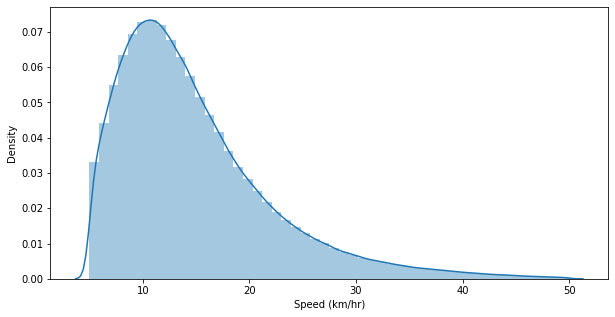

In [ ]:
#Distribution plot after setting the range of speed (5 to 80 km/hr)
plt.figure(figsize = (10,5))
sns.distplot(df['speed'])
plt.xlabel('Speed (km/hr)')
plt.show()

There are trips that were done at a speed of over 100 km/h.

As per the rule in NYC, the speed limit is 25 mph(approx. 40km/h) in New York City.

 **Mostly trips are done at a speed range of 5-25 km/hr.**

### <b>8.Pickup_hour & Dropup_hour

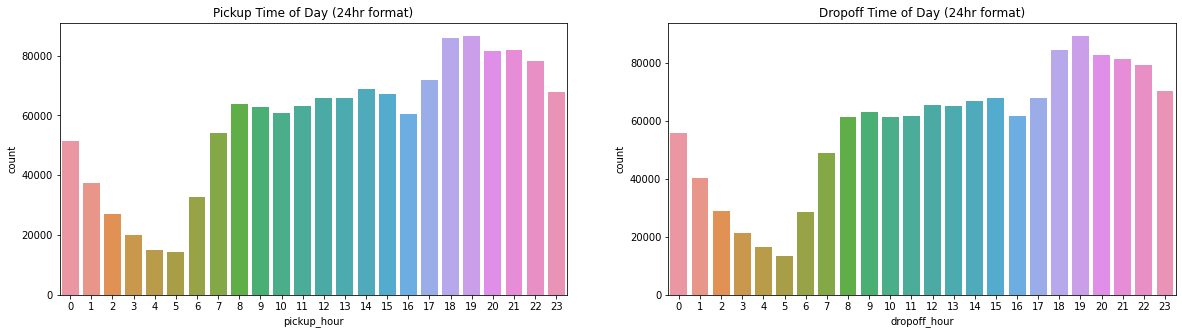

In [ ]:
#lets see pickup and dropoff count each hours of a day
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Time of Day (24hr format)')
ax=sns.countplot(x="pickup_hour",data=df,ax=ax3)
ax4.set_title('Dropoff Time of Day (24hr format)')
ax=sns.countplot(x="dropoff_hour",data=df,ax=ax4)

We see the busiest hours are 6:00 pm to 7:00 pm which makes sense as this is the time for people to return home from work.

### <b> 9. Pickup_day & Dropup_day

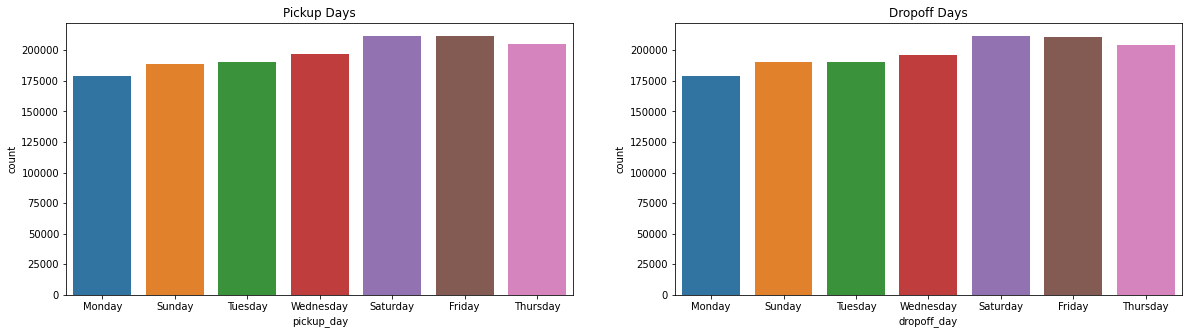

In [ ]:
#lets see pickup and dropoff count days wise
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=df,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=df,ax=ax2)

We see Fridays are the busiest days followed by Saturdays. That is probably because it’s weekend.



### **10.Pickup_month & Dropup_month**

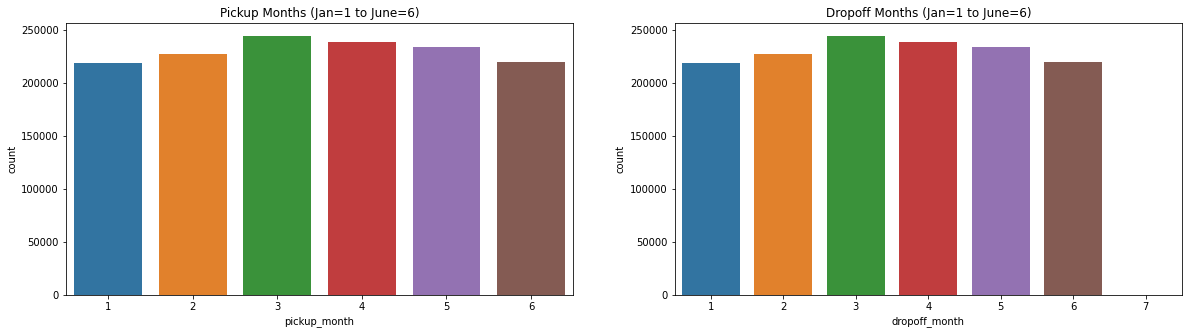

In [ ]:
#lets see pickup and dropoff count month wise
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Months (Jan=1 to June=6)')
ax=sns.countplot(x="pickup_month",data=df,ax=ax1)
ax2.set_title('Dropoff Months (Jan=1 to June=6)')
ax=sns.countplot(x="dropoff_month",data=df,ax=ax2)

There is not much difference in the number of trips across months.

###<b> 11.Latitude and longitude

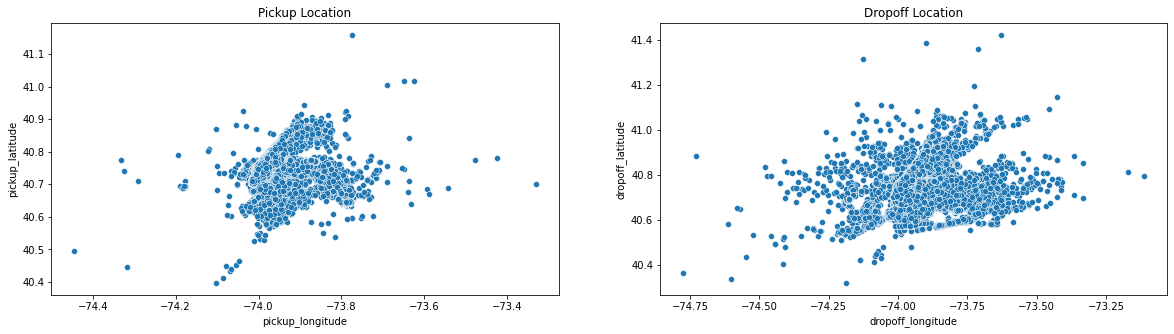

In [ ]:
#lets see pickup and dropoff location
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Location')
ax=sns.scatterplot(x=df.pickup_longitude,y=df.pickup_latitude,ax=ax3)
ax4.set_title('Dropoff Location')
ax=sns.scatterplot(x=df.dropoff_longitude,y=df.dropoff_latitude,ax=ax4)

##<b>Bivariate Analysis

###<b>1.Trip Duration per Vendor

<Figure size 720x360 with 0 Axes>

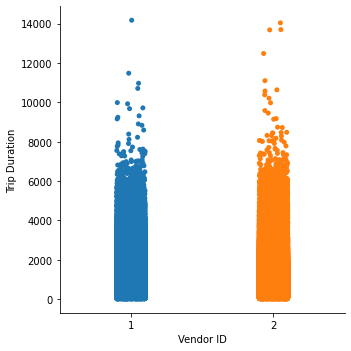

In [ ]:
#vendor v/s Trip duration
plt.figure(figsize = (10,5))
sns.catplot(y='trip_duration',x='vendor_id',data=df,estimator=np.mean)
plt.xlabel('Vendor ID')
plt.ylabel('Trip Duration')
plt.show()

There is no difference beteen  vendor 1 and 2

###<b>2.Trip Duration per Store and Forward Flagt

<Figure size 720x360 with 0 Axes>

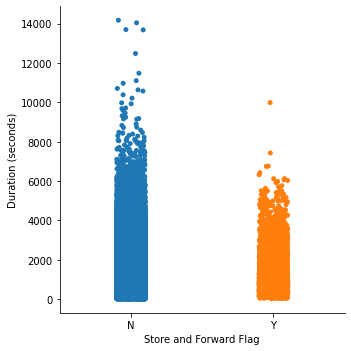

In [ ]:
#Trip Duration v/s Store and Forward Flagt
plt.figure(figsize = (10,5))
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=df,kind='strip')
plt.xlabel('Store and Forward Flag')
plt.ylabel('Duration (seconds)')
plt.show()

So from the above graph we can come to know that mostely long trips data havent store on server.

### <b>3.Trip Duration per hour

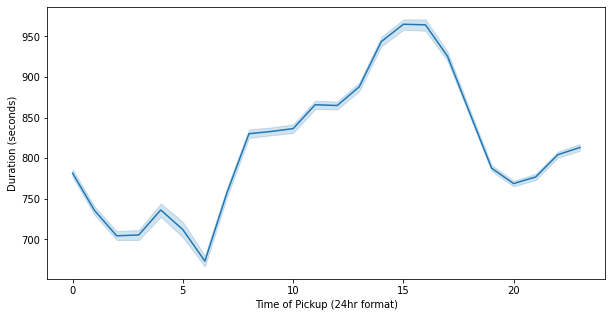

In [ ]:
#Plotting line chart of Trip Duration per hour
plt.figure(figsize = (10,5))
sns.lineplot(x='pickup_hour',y='trip_duration',data=df)
plt.xlabel('Time of Pickup (24hr format)')
plt.ylabel('Duration (seconds)')
plt.show()

* We see the trip duration is the maximum around 3 pm which may be because of traffic on the roads.
* Trip duration is the lowest around 6 am as streets may not be busy.

### <b>4.Trip duration per weekday

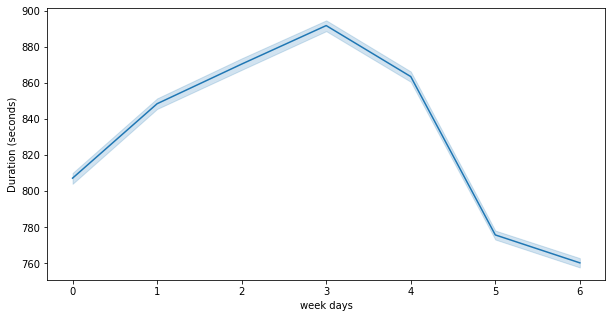

In [ ]:
#Plotting line chart of Trip duration per weekday
plt.figure(figsize = (10,5))
sns.lineplot(x='pickup_day_no',y='trip_duration',data = df)
plt.ylabel('Duration (seconds)')
plt.xlabel('week days')
plt.show()

Trip duration on thursday is longest among all days.

### <b>5.Trip duration per month

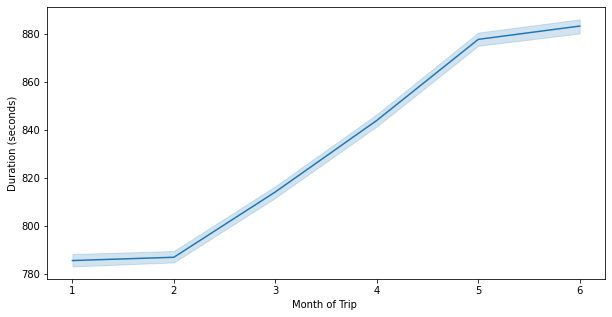

In [ ]:
#Plotting line chart of Trip duration per month
plt.figure(figsize = (10,5))
sns.lineplot(x='pickup_month',y='trip_duration', data = df)
plt.ylabel('Duration (seconds)')
plt.xlabel('Month of Trip ')
plt.show()

* From February, we can see trip duration rising every month.
* There might be some seasonal parameters like wind/rain which can be a factor of this gradual increase in trip duration over a period.


### <b>6.Distance and Hour

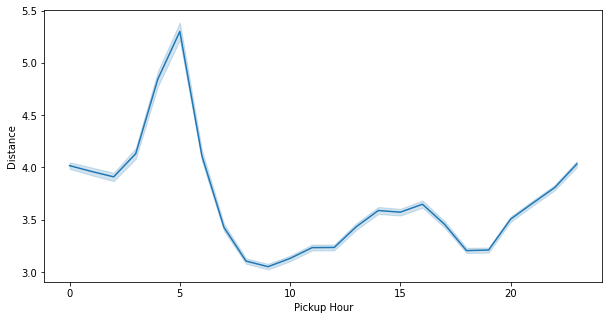

In [ ]:
#Plotting line chart of Distance and Hour
plt.figure(figsize = (10,5))
sns.lineplot(y='distance',x='pickup_hour',data=df)
plt.ylabel('Distance')
plt.xlabel('Pickup Hour')
plt.show()

* Trip distance is highest during early morning hours.
* It is fairly equal from morning till the evening varying around 3 - 3.5 kms.
* It starts increasing gradually towards the late night hours starting from evening till 5 AM and decrease steeply towards morning.


### <B>7.Passenger_count and Trip Duration

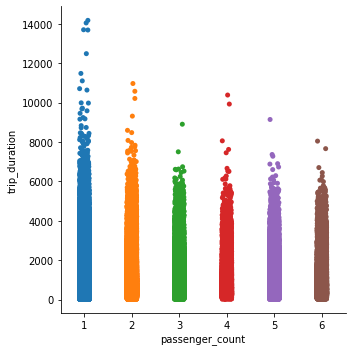

In [ ]:
#lets see trip duration for each passenger count
sns.catplot(y='trip_duration',x='passenger_count',data=df,kind='strip')

### <b>8.Distance and Trip Duration

In [ ]:
#Scatter plot betweet distance and trip duration
plt.figure(figsize = (10,5))
plt.scatter(x='trip_duration', y='distance',data=df)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.show()
